# Optional: House Prices Data Exploration

In this notebook we will explore datasets in which the features are not images, but CSV files with different features, either numeric or categorical. More specifically, we will look at the housing dataset, famous for being used as an introduction to regression problems, which are problems in which we try to predict a continous variable (eg: the price of a house), rather than a discrete one (eg: the label of an image). 

The challenges of working with such a dataset are different from the ones we encounter when working with image data. Because each feature is basically the answer to one question (eg: 'Where is the house?', 'Does it have a pool?', 'What surface does the house have?' etc), some of the features might be missing or might have invalid values.

This notebook can be seen as a starting point to analyize the house prices data. We will load the data and show of some useful pandas functions for visualizing and understanding the data, as well as some transformations useful if we want to later train a model for predicting house prices. 

![alt text](https://i.pinimg.com/originals/fa/6a/74/fa6a7435b27da8fc82705f9552806235.jpg)

In [1]:
from exercise_code.data.csv_dataset import CSVDataset
from exercise_code.data.csv_dataset import FeatureSelectorAndNormalizationTransform
from exercise_code.data.dataloader import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline
%load_ext autoreload
%autoreload 2

# 0. Loading the data

Let us get started by downloading our data. In `exercise_code/data/csv_dataset.py` you can find a class CSVDataset, which is already implemented for you, but you will understand better by following this notebook.

Similar to the last exercise, this class automatically downloads the raw data for you. To do so, simply initialize the class as below:

In [2]:
download_url = 'https://cdn3.vision.in.tum.de/~dl4cv/housing_train.zip'
i2dl_exercises_path = os.path.dirname(os.path.abspath(os.getcwd()))
root_path = os.path.join(i2dl_exercises_path, "datasets", 'housing')
target_column = 'SalePrice'

In [3]:
dataset = CSVDataset(target_column=target_column, root=root_path, download_url=download_url)

You should now be able to see a file called `housing_train.csv` in `i2dl_exercises/data/housing`.

If you wish to redownload the data, simply call:

In [11]:
dataset = CSVDataset(target_column=target_column, root=root_path, download_url=download_url, force_download=True)





0it [00:00, ?it/s]





  0%|          | 0/91571 [00:00<?, ?it/s]



  9%|▉         | 8192/91571 [00:00<00:02, 38788.54it/s]



 45%|████▍     | 40960/91571 [00:01<00:00, 51403.84it/s]



98304it [00:01, 74090.39it/s]                           


# 1. Data Exploration

We will now have a look at the dataset. Before doing so, however, we will manually load the data here, outside the `CSVDataset` class. We can simply load it by calling the Pandas function `read_csv` with the correct path of our dataset.

The entire dataset is contained in `i2dl_exercises/data/housing/housing_train.csv` which you have downloaded before.

In [4]:
i2dl_exercises_path = os.path.dirname(os.path.abspath(os.getcwd()))
housing_file_path = os.path.join(i2dl_exercises_path, "datasets", "housing", "housing_train.csv")
df = pd.read_csv(housing_file_path)

Before continuing with data exploration, let's just see a few rows of the newly created `pd.DataFrame`, so that we can see what are the features of the data.

In [5]:
# Inspect a few rows from the dataset.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.1 Statistics about the numeric features

In [6]:
# Using the describe function we can get an overview about numerical ranges of the features.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.2 Statistics about the target column

The housing dataset is used for trying to predict the price of a house by looking at several different characteristics of it. Thus, our target column will be the one refering to the sale price. 

In [7]:
# Check the names of all columns so that we can find the exact name of the target column.
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# We can also look at the same statistics for the target variable.
target_column = 'SalePrice'
df[target_column].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

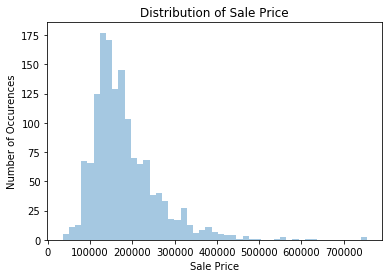

In [9]:
# To better understand the price distribution, we can also look at a histogram of the prices. 
sns.distplot(df[target_column], kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

## 1.3 Looking at the relationship between a feature and the target variable

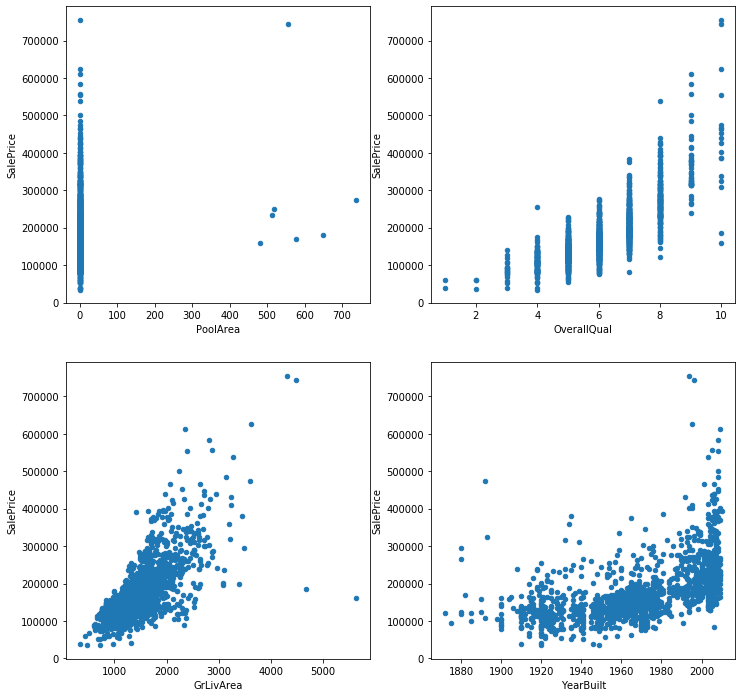

In [10]:
# We can look at the relationship between different features and the target variable.
# For example, we can see how (and if) the pool area, overall quality, living area 
# or the year the house was built influence the price.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

df.plot.scatter('PoolArea', target_column, ax=axes[0][0])
df.plot.scatter('OverallQual', target_column, ax=axes[0][1])
df.plot.scatter('GrLivArea', target_column, ax=axes[1][0])
df.plot.scatter('YearBuilt', target_column, ax=axes[1][1])

## 1.4 Plotting correlations

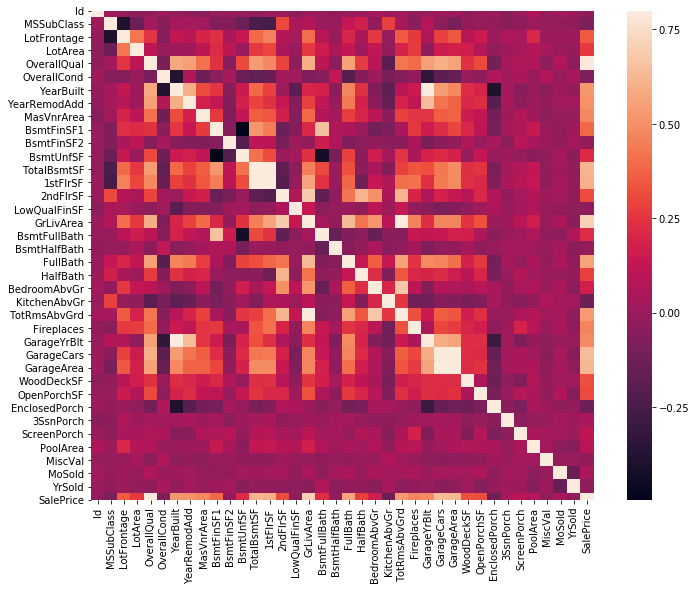

In [11]:
# We can also plot the correlation between all pairs of features.
# Looking at the lightly-coloured cells in the plot, we can discover 
# features that are correlated. 
#
# For example, 'GarageYrBlt' and 'YearBuilt' have high correlation.
# Also, 'GarageCars' and 'GarageArea' are highly correlated (what a surprise!)

f, ax = plt.subplots(figsize=(12, 9))

corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

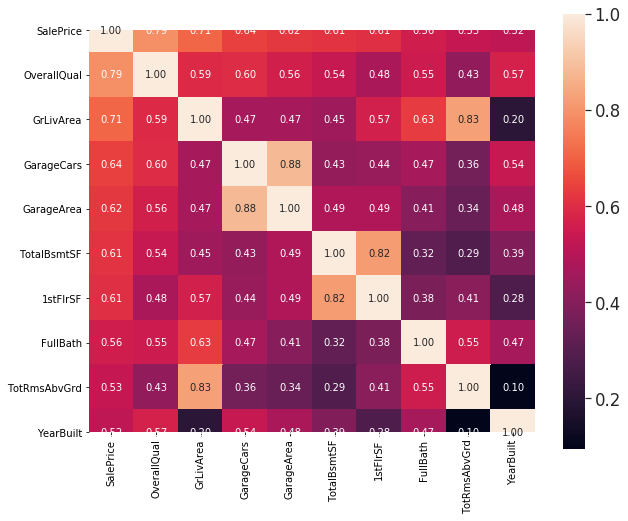

In [12]:
# Saleprice correlation matrix:
# We look at the 10 most correlated variables for our target "Sale Price".
#
# This shows that there are certain attributes much more correlated than 
# the others for SalePrice.

f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.5)

k = 10
cols = corrmat.nlargest(k, target_column)[target_column].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

## 1.5 Pairwise scatterplots

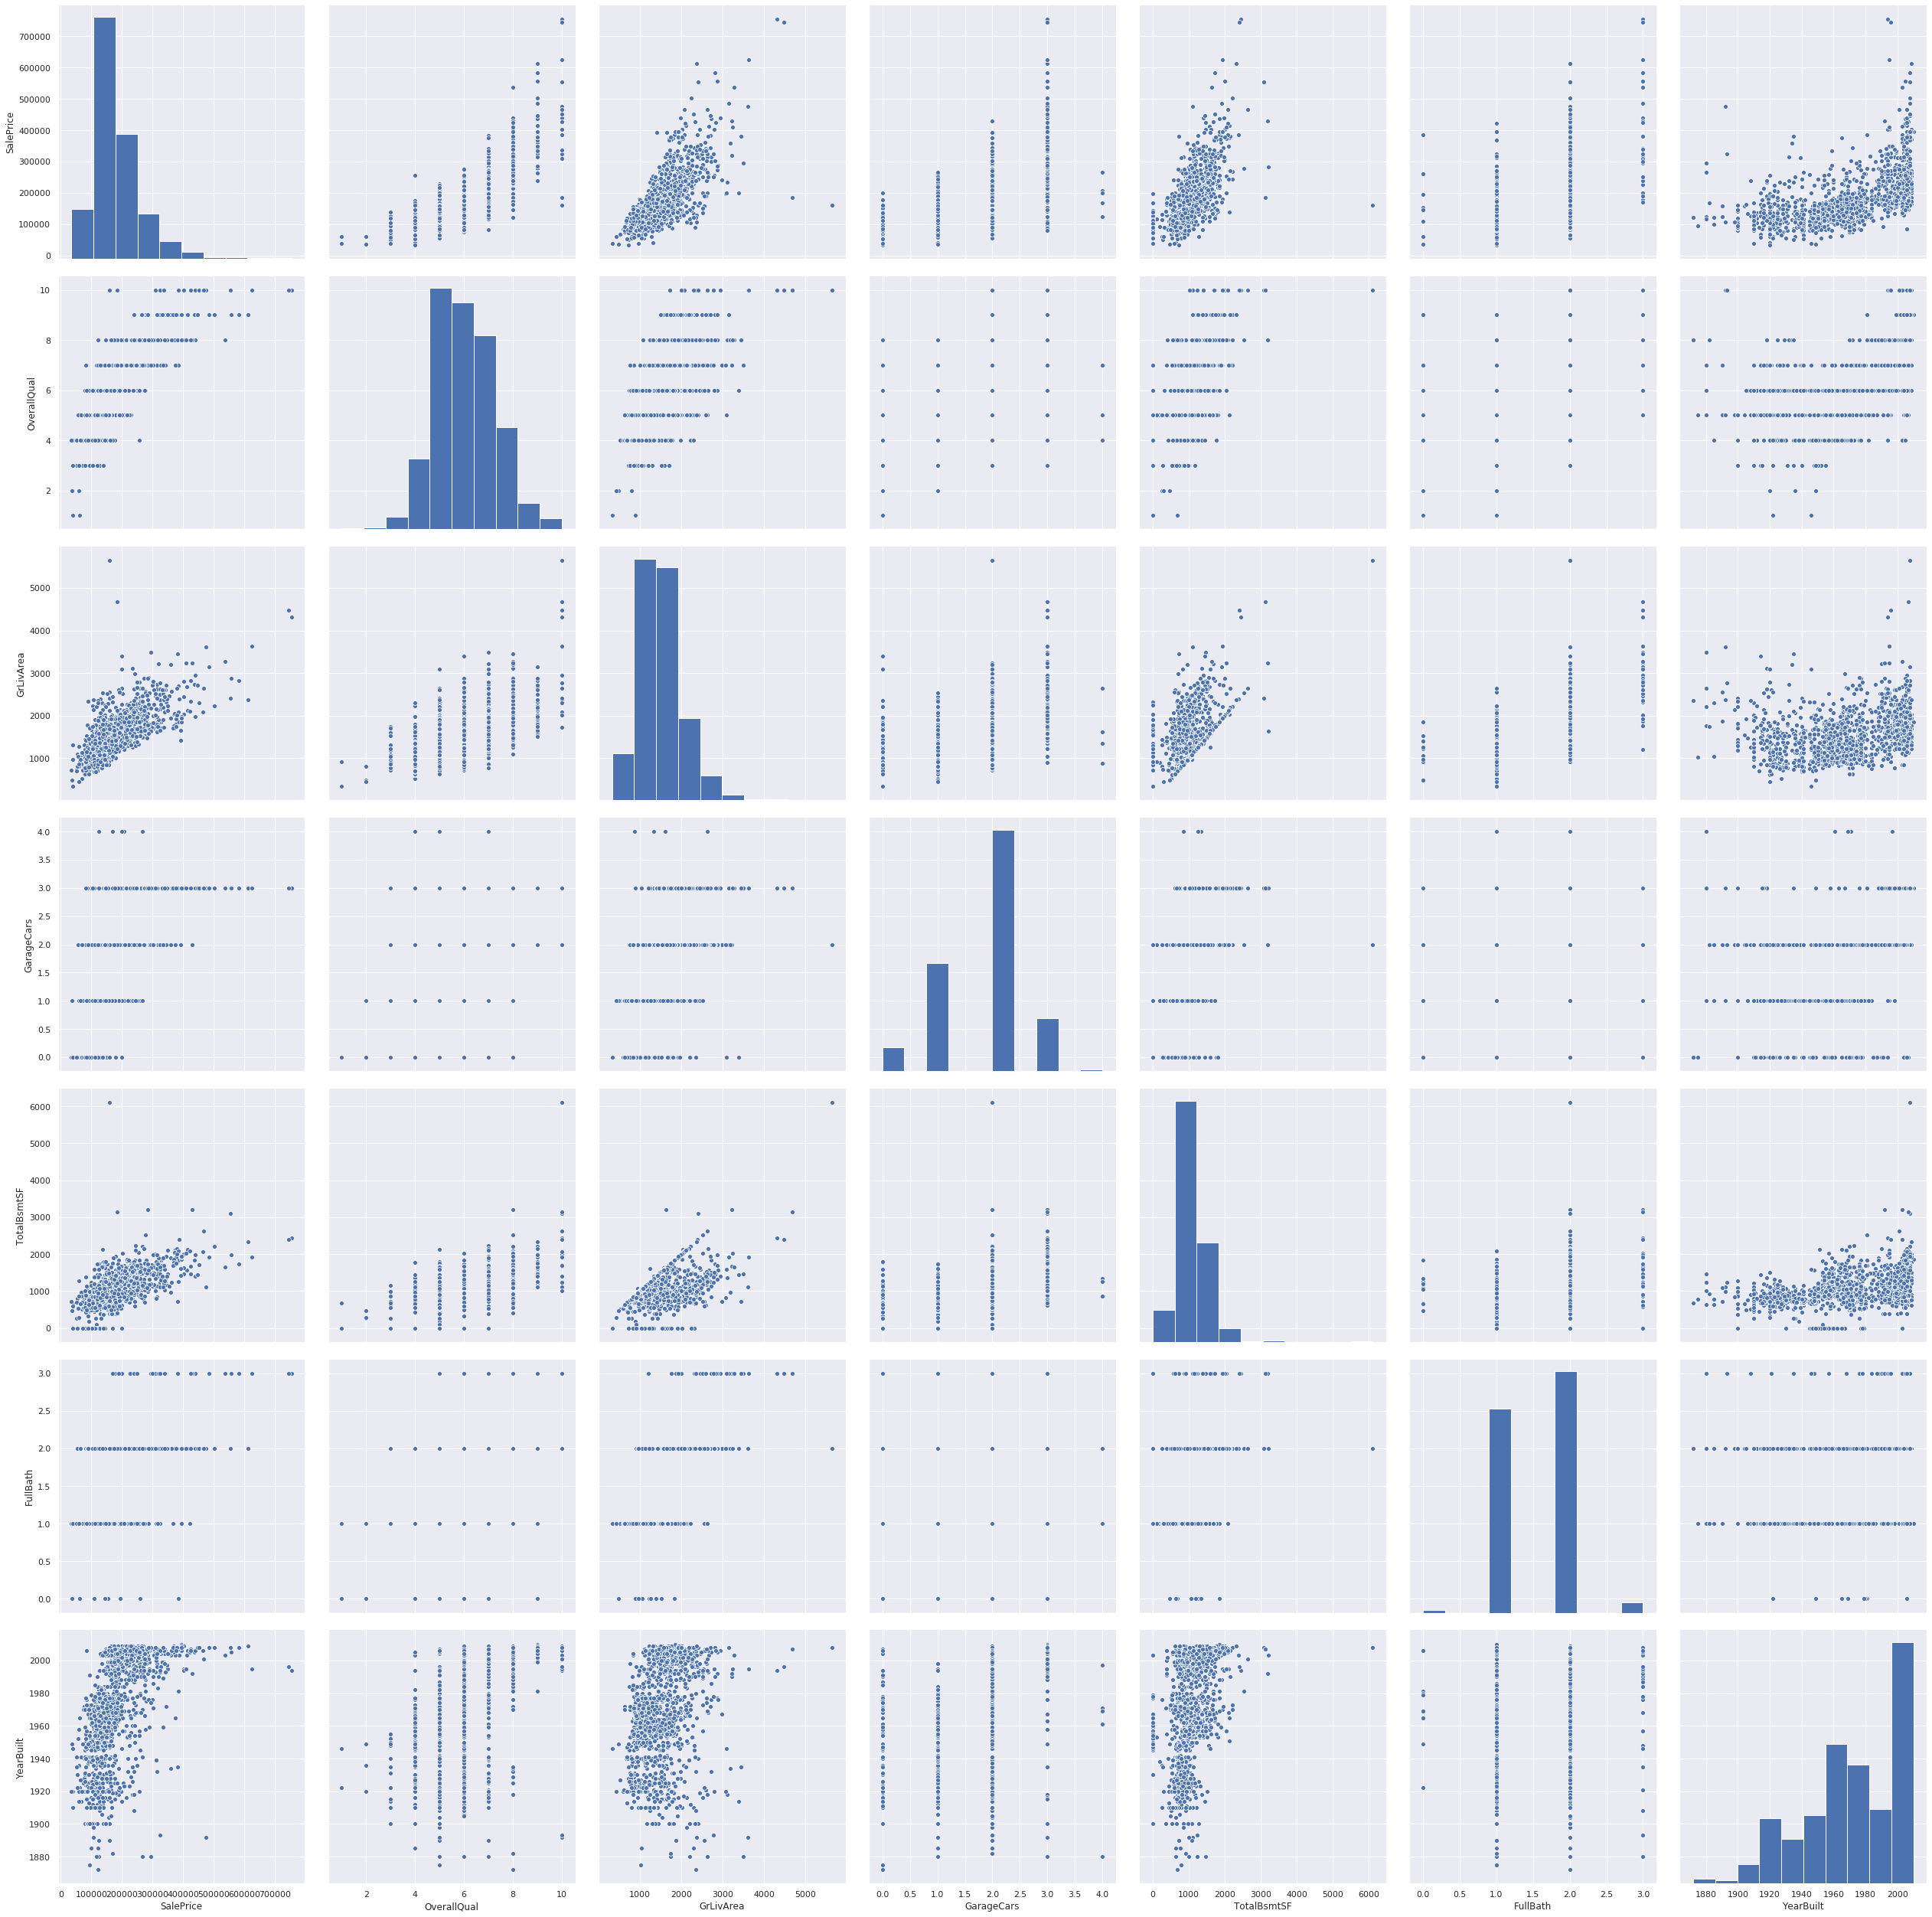

In [36]:
# Next, we explore the scatter plot of selected attributes.
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set()
sns.pairplot(df[cols], height = 5)

# 2.Cleaning and preparing the data

Now, that we have a better understanding of the data, we can start preparing it for the model.

## 2.1 Dealing with missing values

Values can be missing from a dataset for different reasons and the missing values can be random or not. Even if dropping the rows with missing values seems to be a tempting solution, some algorithms might not support that and you may see an error message like this:

<pre><code> ValueError: Input contains NaN, infinity or a value too large for dtype('float64'). </code></pre>

Or, if they support it, their performance might be affected, because we might unawarely introduce a bias in the model. In some situations, we might not even have access to too much data, as data collection is an expensive process, so it is too valuable too just throw away an entire row for a single missing value. Instead, we will focus on filling out the missing values.

For further explanations regarding missing values and an interactive tutorial, you can check out [this tutorial](https://www.craft.ai/blog/missing-values).

In [13]:
# First, let's see if there are any missing values in the dataset.
df.isnull().values.any() #values.any()


True

In [14]:
# We can see how many null entries are for each column.
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
# If one column has much more missing values than present ones, 
# then it is reasonable to completely remove that column.
max_number_of_nans = 0.5 * len(df)
df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nans)]


# We can fill in the missing numerical values using the mean
# for each column:
df = df.fillna(df.mean())

# Let's check if there are still missing values!
df.isnull().values.any()


True

In [17]:
# There are still categorical variables with missing values.
# One simple way to fill them is to choose the value with the highest
# frequency on each column. 
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    most_frequent_value = df[column].value_counts().nlargest(n=1).index[0]
    df[column].fillna(most_frequent_value, inplace=True)

In [18]:
# Still any null values? No, we're done!
df.isnull().values.any()

False

For simplicity, we only showed how to fill in the missing values using the mean for numeric fields and the mode for categorical variables. A more sophisticated metod for filling in missing values is using a machine learning algorithm (such as decision trees or K-nearest-neighbours) for predicting them, using the columns with no missing values as training data, but this will not be covered in this notebook.

## 2.3 Dealing with categorical variables

So until now we made sure there are no missing values. But we are still left with some categorical data, such as the 'LotShape' feature, which we cannot just feed into an algorithm. We need to transform these values to numerical values first. We will use a [one-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for this.

In [20]:
# Check out possible values of a categorical column.
np.unique(df['LotShape'])

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In Pandas, we can convert categorical variables to one-hot encodings simply by using the `get_dummies` function. 


For example, for the 'LotShape' column we had the values 'IR1', 'IR2', 'IR3' and 'Reg', then after the one-hot encoding process we will have 4 columns instead, 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR2' and 'LotShape_Reg' and only one of them will be 1 (depending on the original value), while the rest will be 0.

In [23]:
df = pd.get_dummies(df)

# Key error: 'LotShape' does not exist anymore.
# df['LotShape']

# 'LotShape_IR1' has only the values 0 and 1.
np.unique(df['LotShape_IR1'])


array([0, 1], dtype=uint8)

## 2.2 Normalizing the data

Just as we did with images, we also need to normalize our data, as machine learning algorithms do not perform well when different features have different scales. If we want to normalize a feature $ x $ in the $[0, 1]$ range, then we can use the following formula:

$$ x_\text{new} = \frac{x - x_\text{min}}{x_\text{max} - x_\text{min}} $$

In Pandas, we can use the [min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and [max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html) DataFrame methods in order to find the minimum and maximum value per column, for each numerical feature. 

In [28]:
# Pandas knows how to broadcast the df.min() dataframe (which has
# just one row with the minimum value for each column) such that
# we can subtract it from df.
df = (df - df.min()) / (df.max() - df.min())

# Now all values are between 0 and 1.
df.head()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

## 2.3 Implementing a transform

Until now, we have shown the usual csv dataset preprocessing steps on the raw data. The aim, however, is to encapsulate both the data and the transforms in a `CSVDataset` object and to apply the transform not on the whole data at once, but rather on each item and only when required (that is, when `CSVDataset.__getitem__` will be called for that specific row). Even though the housing prices dataset is small enough to fit in memory and apply the tranform at once on the whol dataframe, in other situations we might have to deal with much bigger datasets, so it is good practice to implement transforms that are applied on individual rows of the dataframe, especially as this is also the way in which the standard PyTorch transforms are applied.

Because in the next exercise we will use the housing dataset for training a small model, we want to implement a transform that does the following:
* Selects a few (2-3) numeric columns from the dataframe
* Normalizes these selected features between 0 and 1 
* Discards the rest of the features

In machine learning, it is always important that any preprocessing step we apply on the train data is also applied on the test and validation data. For normalization, we have seen that we need the minimum and maximum value of each numeric column. For filling in missing numeric values (if any), we need the mean value. These values we should pre-compute and feed them to the transform and for the test dataset we should also use it.

We have already implemented the transform for you, you can check it out the `FeatureSelectorAndNormalizationTransform` class in `exercise_code/data/csv_dataset.py`.

In [25]:
# Re-read the data first.
df = pd.read_csv(housing_file_path)

In [26]:
# Select only 2 features to keep plus the target column.
selected_columns = ['OverallQual', 'GrLivArea', target_column]
mn, mx, mean = df.min(), df.max(), df.mean()

column_stats = {}
for column in selected_columns:
    crt_col_stats = {'min' : mn[column],
                     'max' : mx[column],
                     'mean': mean[column]}
    column_stats[column] = crt_col_stats    

In [27]:
transform = FeatureSelectorAndNormalizationTransform(column_stats, target_column)
train_dataset = CSVDataset(target_column=target_column, root=root_path, download_url=download_url, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, drop_last=True)

Now, as already shown in the cifar10 notebook, we will be able to use the housing prices dataloader for training a model by directly accessing the batches:

In [27]:
for batch in dataloader:
    # do some machine learning (we'll see in the next weeks how!)
    pass

TypeError: iter() returned non-iterator of type 'NoneType'